# 인공신경망

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 경고문 제거
import warnings
warnings.filterwarnings('ignore')

# 한글폰트 설정 영역: 당신 OS에 맞게 다시 설정하시오 ...
matplotlib.rc('font', family='AppleGothic')
import seaborn as sns
sns.set(font="AppleGothic", rc={"axes.unicode_minus":False}, style='white')

## 데이터 구성하기

In [2]:
# 당신의 경로에 맞게 다시 설정하시오 ...
df_raw = pd.read_csv('/home/piai/Bigdata 실습과제/2. Big Data 분석/HMEQ.csv', encoding = 'euc-kr')
df_raw.head()

df_raw.isnull().sum(axis=0)
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

df_raw_x = df_raw_dummy.drop('BAD', axis=1, inplace=False)
df_raw_y = df_raw_dummy['BAD']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print('분할 전 설명변수 데이터: ', df_raw_x.shape)
print('분할 후 설명변수 데이터: Train', df_train_x.shape, 'Test',df_test_x.shape)

분할 전 설명변수 데이터:  (3748, 18)
분할 후 설명변수 데이터: Train (2623, 18) Test (1125, 18)


## MLPClassifier 모델 생성

In [3]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on training set: {:.3f}'.format(nn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(nn_uncustomized.score(df_test_x, df_test_y)))

print(nn_uncustomized.get_params().keys())
print(nn_uncustomized.get_params().values())

Accuracy on training set: 0.722
Accuracy on test set: 0.683
dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


## 모델 파라미터 변경

### Hidden Layer

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


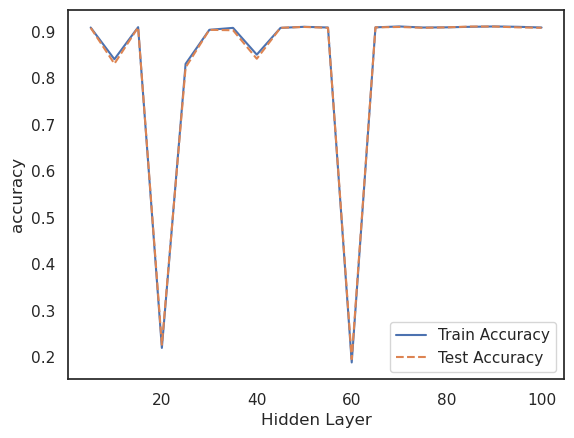

In [5]:
train_accuracy = []
test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]

print(para_hidden)

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

df_accuracy_hidden.round(3)

plt.plot(para_hidden, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()
plt.show()

### Activation

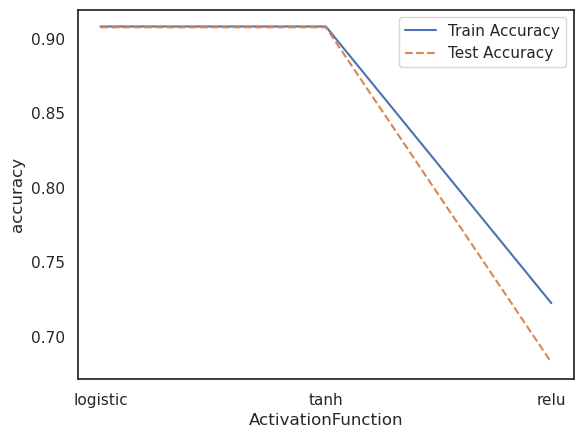

In [6]:
train_accuracy = []
test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation=v_function, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

df_accuracy_function.round(3)

plt.plot(para_function, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('ActivationFunction')
plt.legend()
plt.show()

## Scale 변환

In [15]:
v_feature_name = df_train_x.columns

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state=1234)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))

train data X size:(2623, 18)
test data X size:(1125, 18)


## Scale 변환 후 모델 재생성

In [16]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
print('Accuracy on training set: {:.3f}'.format(nn_scaled.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.970
Accuracy on test set: 0.941


## 모델 파라미터 변경

### Hidden Layer

In [17]:
train_accuracy = []
test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]

print(para_hidden)

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden),random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [18]:
train_accuracy = []
test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]

print(para_hidden)

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden),random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


### Activation

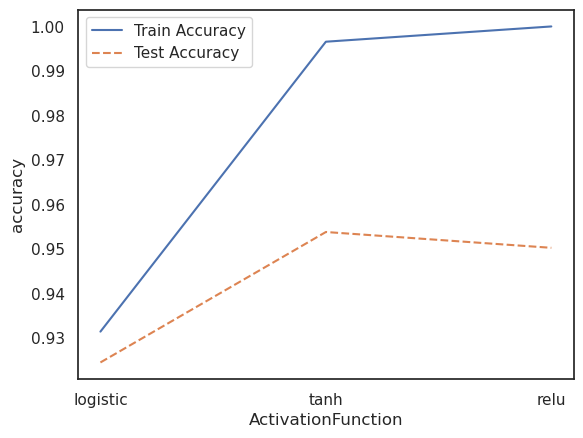

In [19]:
train_accuracy = []
test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation=v_function, hidden_layer_sizes=(80, 80),random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

df_accuracy_function.round(3)

plt.plot(para_function, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('ActivationFunction')
plt.legend()
plt.show()

### Solver

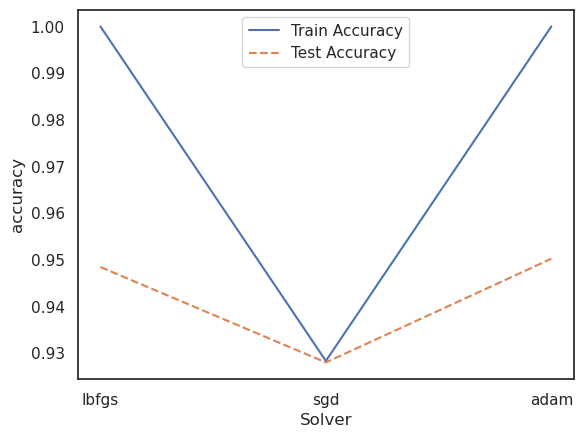

In [20]:
train_accuracy = []
test_accuracy = []
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver=v_solver, activation='relu', hidden_layer_sizes=(80, 80),random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy

df_accuracy_solver.round(3)

plt.plot(para_solver, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Solver')
plt.legend()
plt.show()

### Mini Batch

[20, 40, 60, 80, 100, 120, 140, 160, 180]


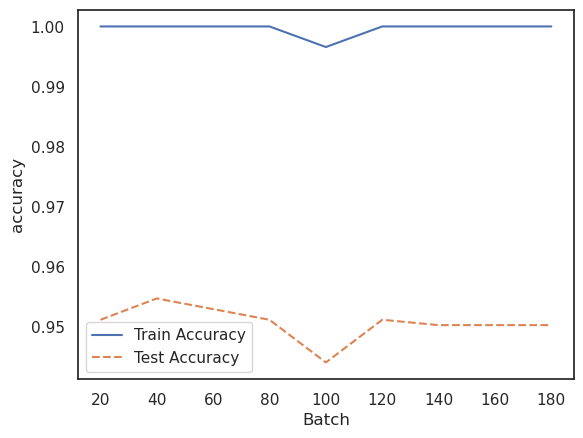

In [21]:
train_accuracy = []
test_accuracy = []
para_batch = [20 * batch for batch in range(1, 10)]

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size=v_batch, solver='adam', activation='relu', hidden_layer_sizes=(80, 80),random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch['Mini Batch'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch['TestAccuracy'] = test_accuracy

df_accuracy_batch.round(3)

plt.plot(para_batch, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_batch, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Batch')
plt.legend()
plt.show()

## 결론 도출 - 최종 모델 선택

In [23]:
nn_final = MLPClassifier(hidden_layer_sizes=(80, 80), activation='relu', solver='adam', batch_size=100, random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print('Accuracy on training set: {:.3f}'.format(nn_final.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(nn_final.score(df_scaled_test_x, df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.997
Accuracy on test set: 0.944
Confusion matrix:
[[1008   13]
 [  50   54]]
              precision    recall  f1-score   support

           0      0.953     0.987     0.970      1021
           1      0.806     0.519     0.632       104

    accuracy                          0.944      1125
   macro avg      0.879     0.753     0.801      1125
weighted avg      0.939     0.944     0.938      1125



Standard : 0.662  
Roubstor : 0.632